# Understanding rates of change (변화에 대하여)

변화는 '__시간의 차이__'에서 비롯되며, <br/>
순간은 그저 '__한 순간__'일 뿐이다.

즉, "순간의 변화" 라는 표현은 모순된 표현이 연결된 역설적인 문장이다. <br/>
* 순간(instantaneous): 어느 특정 한 점 ( at, ● ) 
* 변화(change): 두 시점 사이에서 발생하는 차이 ( between, | | )

<br/>

※ '모순'과 '역설'은 다르다 
- 모순: 말 자체가 안 되는 것 (e.g., 무엇이는 막는 방패와 무엇이든 뚫는 창)
- 역설: 모순 처럼 보이지만 그 안에 숨은 진리가 있는 것 (e.g., 작은 거인)

<br/>

결국, 미분에서 말하는 순간(instantaneous) := 아주 짧은 시간 간극 

<br/>

instantaneous : 순간의 (=동시에 일어나는) 
* instant에서 온 건가?


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [4]:
"""  to plot volume or flow rate vs. time with correct labels.
"""
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

## 1. Calculating average flow rates from volumes

In [6]:
""" These are the actual volume and flow rate functions, 
    used throughout the chapter. You can ignore the formulas that define them.
"""
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

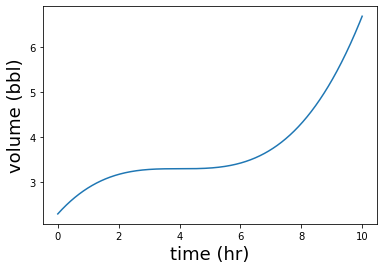

In [8]:
plot_volume(volume,0,10)

### 1.1 Implementing an ```average_flow_rate``` function

In [9]:
def average_flow_rate(v,t1,t2):
    return (v(t2) - v(t1))/(t2 - t1)

In [10]:
volume(4)

3.3

In [11]:
volume(9)

5.253125

In [12]:
average_flow_rate(volume,4,9)

0.390625